In [1]:
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
traindata = pd.read_csv('sign_mnist_train.csv')

In [3]:
trainlabel=traindata['label'].values

In [4]:
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values

In [5]:
trainimages=trainimages.reshape(-1,28,28,1)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')

In [7]:
testlabel=testdata['label'].values

In [8]:
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values

In [9]:
testimages=testimages.reshape(-1,28,28,1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
traingen=ImageDataGenerator(rotation_range=20,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [12]:
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

In [13]:
testgen=ImageDataGenerator(rescale=1/255.0)
testdata_generator = testgen.flow(testimages,testlabel)

In [21]:
model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.4))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))



In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_9 (Batch (None, 10, 10, 128)      

In [24]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [25]:
history=model.fit(traindata_generator,epochs=30,validation_data=validationdata_generator,callbacks=[callback])

Epoch 1/30
773/773 [==============================] - 13s 17ms/step - loss: 0.8414 - accuracy: 0.7405 - val_loss: 0.4264 - val_accuracy: 0.8361
Epoch 2/30
773/773 [==============================] - 12s 15ms/step - loss: 0.1985 - accuracy: 0.9388 - val_loss: 0.6105 - val_accuracy: 0.7067
Epoch 3/30
773/773 [==============================] - 11s 14ms/step - loss: 0.1081 - accuracy: 0.9662 - val_loss: 0.6657 - val_accuracy: 0.6831
Epoch 4/30
773/773 [==============================] - 12s 15ms/step - loss: 0.0948 - accuracy: 0.9694 - val_loss: 0.1999 - val_accuracy: 0.9242
Epoch 5/30
773/773 [==============================] - 11s 15ms/step - loss: 0.0699 - accuracy: 0.9773 - val_loss: 0.3276 - val_accuracy: 0.7785
Epoch 6/30
773/773 [==============================] - 11s 15ms/step - loss: 0.0595 - accuracy: 0.9810 - val_loss: 0.2269 - val_accuracy: 0.9585
Epoch 7/30
773/773 [==============================] - 12s 15ms/step - loss: 0.0523 - accuracy: 0.9833 - val_loss: 0.1561 - val_accuracy:

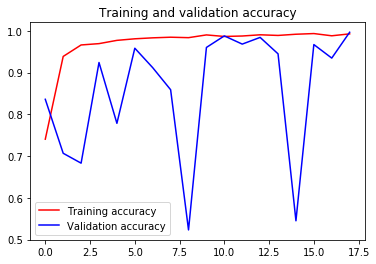

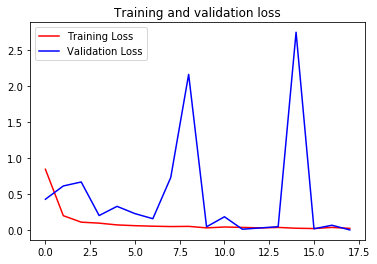

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
print("test accuracy: "+ str(model.evaluate_generator(testdata_generator)[1]*100))

test accuracy: 99.832683801651


In [28]:
model.save_weights("vgglikeconv4.h5")